# CSE 532 Assignment \#2 (Due 3/1/23)
An important aspect to text mining and natural language processing is measuring word frequency and trends in word usage.  This assignment deals with a simple exercise in loading a text file into Python and computing word frequency statistics and trends.  It requires usage of text files, strings and dataframes, so it is heavily encouraged that you take a look at relevant sessions (13-17) if you have not already done so.

(a) Locate a movie script, play script, poem, or book of your choice in .txt format. You are free to choose nearly any novel, movie script, or play that you like, with the qualification that your chosen document **must have a minimum of 5 chapters, scenes, and/or acts that distinguish one portion of the document's narrative from another**.  For example, the novel "Great Expectations" has 59 chapters, the script for "Jaws" has about 27 scenes, and all or almost all Shakespearean plays have exactly five acts. It is important that for part (e) of the document that these segments exist for your document. [Project Gutenburg](https://www.gutenberg.org/) is a great resource for this if you're not sure where to start.  **Make sure you include your text file in your submission.  If your document has a particularly large number of segments, it is okay to trim the document to something more manageable (ex: working with only chapters 1-20 of "Great Expectations.")**








**You can use .py files, .ipynb files, or a combination of the two in your solution.  Zip these file(s) along with a simple README telling us what to run to generate the list, data-frames, and plots into a zip file with the name <LN_FN_2.zip>, where LN is your last-name and FN is your first-name, and submit this file to Blackboard.**

(b) Load the words of this structure in sequential order of appearance into a one-dimensional Python list (i.e. the first word should be the first element in the list, while the last word should be the last element) that is **case insensitive**.  It's up to you how to deal with special chacters -- you can remove them manually, ignore them during the loading process, or even count them as words, for example.  **Make sure you have this list clearly assigned to a variable, so we can evaluate it during grading.**

(c) Use your list to create **and print** a two-column pandas data-frame with the following properties: <br>
i. The first column for each index should represent the word in question at that index <br>
ii. The second column should represent the number of times that particular word appears in the text. <br>
iii. The rows of the data-frame should be ordered according to the **first** occurrence of each word. <br>
iv. It's up to you whether or not your data-frame will include an index per row.  <br>**Make sure you have this data-frame clearly assigned to a variable, so we can evaluate it during grading.**

Ex: if the first word in your text is "the" which occurs 500 times and the second is "balcony" which only appears twice, your data-frame should _begin_ like the following:

| | Word | Count |
| --- | --- | --- |
| 1 | "the" | 500 |
| 2 | "balcony" | 2 |
| ... | ... | ... |
Again, the indices are optional.


(d) **Stop-words** are commonly used words in a given language that often fail to communicate useful summative information about its content.  The attached file "stop_words.txt" has a simple list of common stop words assigned to a variable.  For this part of the assigment, you are to create a modified copy of the data-frame from (c) with the following modifications: _i. all stop words have been removed from the data-frame_ and _ii. the data frame rows have been sorted in decreasing order of frequency counts_.  **Again, make sure you have this data-frame clearly assigned to a variable, so we can evaluate it during grading.** 

(e) While total word counts can provide a useful measure of the content of a document, they cannot reveal much about its underlying trends.  In the context of document analysis, the term _trend_ implies a direction (in terms of theme, mood, etc.) in which the content changes throughout the narrative.  For example, some works of fiction begin with a comedic tone, and take on a more serious tone in later stages, or vice versa.  While tone shifts are a bit beyond the scope of this assignment, it *is* feasible to monitor which **words** become more or less common within the document over time (ex: a character killed in the first act of a screenplay will *potentially* appear less frequently in subsequent acts).  For the last part of your assignment, you are to do the following: <br>
i. Use your dataframe from part d to pinpoint the six most commonly occurring words in your text (if there are stop-words that were not successfully excluded programmatically in part d due to punctuation, etc., you should manually exclude them here). <br>
ii. For each of the six words, compute the ratio of its appearances per narrative segment (chapter, act, etc.) compared to the sum across the work overall.  These quantities can be either in percentile or decimal. <br>
iii. You are then to create a 2 x 3 or 3 x 2 series of subplots and, for each of the six words, provide a bar graph that depicts the ratios (not raw counts) across segments.

As an example, suppose a hypothetical work has five chapters, and one of the six most common words is "Barcelona"; further, suppose this word appears 10, 20, 15, 5, and 0 times in chapters 1, 2, 3, 4, and 5 respectively.  The bar graph for this plot should look something like the below: <br>
![Barcelona Trends Bar Graph](barcelonatrends.png "")

Part A. The text file I chose was The Young Castellan: A Tale of the English Civil War. To make it easier to proccess I truncated the file to 10 chapters and removed project gutenberg's metadata so I would only have to parse the chapters. I also verified that the word "chapter" does not occur in the actual text.

In [230]:
#Problem B
import string

file_path = 'The Young Castellan: A Tale of the English Civil War by George Manville Fenn.txt'

with open(file_path, 'r') as file:
    special_character_filter = str.maketrans("", "", string.punctuation)
    txt = [word.translate(special_character_filter).strip().lower() for line in file for word in line.split()]

print(txt)

['chapter', 'one', 'in', 'the', 'old', 'armoury', 'see', 'these', 'here', 'spots', 'o', 'red', 'rust', 'master', 'roy', 'i', 'should', 'be', 'blind', 'as', 'poor', 'old', 'jenkin', 'if', 'i', 'couldnt', 'ben', 'ay', 'that', 'you', 'would', 'sir', 'poor', 'old', 'jenk', 'close', 'upon', 'ninety', 'he', 'be', 'and', 'thats', 'another', 'thing', 'what', 'do', 'you', 'mean', 'said', 'the', 'boy', 'addressed', 'what', 'do', 'i', 'mean', 'sir', 'why', 'i', 'mean', 'as', 'thats', 'another', 'thing', 'as', 'shows', 'as', 'old', 'englands', 'wore', 'out', 'and', 'rustin', 'and', 'moulderin', 'away', 'is', 'this', 'dutch', 'or', 'english', 'ben', 'said', 'the', 'manlylooking', 'boy', 'who', 'had', 'just', 'arrived', 'at', 'the', 'age', 'when', 'dark', 'lads', 'get', 'teased', 'about', 'not', 'having', 'properly', 'washed', 'the', 'sides', 'of', 'their', 'faces', 'and', 'their', 'upper', 'lips', 'which', 'begin', 'to', 'show', 'traces', 'of', 'something', 'coming', 'up', 'i', 'dont', 'understand'

In [231]:
#Problem C
import pandas as pd
i = 0
j = 0
found = False
uniqueWordCount = 0
words = []
count = []

while(i<len(txt)):
    j = 0
    found = False
    #Has this word already been seen
    while((j < len(words)) and (found == False)):
        if(txt[i] == words[j]):
            count[j] = count[j] + 1
            found = True
        j += 1
    #If not, create a new index for it
    if(found == False):
        words.append(txt[i])
        count.append(1)
        uniqueWordCount += 1
    i += 1

# Create a DataFrame from the lists
word_counts = pd.DataFrame({'Word': words, 'Count': count})

# Print the resulting DataFrame
print(word_counts)

            Word  Count
0        chapter     10
1            one    116
2             in    309
3            the   1372
4            old    147
...          ...    ...
3376     deposit      1
3377    cupboard      1
3378   apparatus      1
3379  individual      1
3380   dismissed      1

[3381 rows x 2 columns]


In [232]:
stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "his","her","him","she","they","them","hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "i","ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]

In [233]:
#Problem D
df_filtered = word_counts[~word_counts['Word'].isin(stop_words)]
df_filtered = df_filtered.sort_values(by='Count', ascending=False)

#Filters out about 400 entires
print(df_filtered.head(6))

    Word  Count
14   roy    310
29   sir    288
24   ben    166
89  dont    114
43   boy    109
6    see    102


In [234]:
#Problem E
# Read the entire content of the file into a string
with open(file_path, 'r') as file:
    text_as_string = file.read()

translator = str.maketrans("", "", string.punctuation)
text_as_string = text_as_string.translate(translator).lower()

chapters = text_as_string.split("chapter")

#6 arrays, one for each of the top 6 words
roy = [0] * 11
sir = [0] * 11
ben = [0] * 11
dont = [0] * 11
boy = [0] * 11
see = [0] * 11

i = 0
j = 0
while(i < 11):
    j = 0
    tmp = chapters[i].split()
    while(j < len(tmp)):
        if(tmp[j] == "roy"):
            roy[i] += 1
        j += 1
    i += 1

i = 0
j = 0
while(i < 11):
    j = 0
    tmp = chapters[i].split()
    while(j < len(tmp)):
        if(tmp[j] == "sir"):
            sir[i] += 1
        j += 1
    i += 1

i = 0
j = 0
while(i < 11):
    j = 0
    tmp = chapters[i].split()
    while(j < len(tmp)):
        if(tmp[j] == "ben"):
            ben[i] += 1
        j += 1
    i += 1
    
i = 0
j = 0
while(i < 11):
    j = 0
    tmp = chapters[i].split()
    while(j < len(tmp)):
        if(tmp[j] == "dont"):
            dont[i] += 1
        j += 1
    i += 1

i = 0
j = 0
while(i < 11):
    j = 0
    tmp = chapters[i].split()
    while(j < len(tmp)):
        if(tmp[j] == "boy"):
            boy[i] += 1
        j += 1
    i += 1

i = 0
j = 0
while(i < 11):
    j = 0
    tmp = chapters[i].split()
    while(j < len(tmp)):
        if(tmp[j] == "see"):
            see[i] += 1
        j += 1
    i += 1

del roy[0]
roySum = sum(roy)
del sir[0]
sirSum = sum(sir)
del ben[0]
benSum = sum(ben)
del dont[0]
dontSum = sum(dont)
del boy[0]
boySum = sum(boy)
del see[0]
seeSum = sum(see)

i = 0
while(i<10):
    roy[i] = roy[i]/roySum
    i += 1

i = 0
while(i<10):
    sir[i] = sir[i]/sirSum
    i += 1

i = 0
while(i<10):
    ben[i] = ben[i]/benSum
    i += 1
    
i = 0
while(i<10):
    dont[i] = dont[i]/dontSum
    i += 1
    
i = 0
while(i<10):
    boy[i] = boy[i]/boySum
    i += 1
    
i = 0
while(i<10):
    see[i] = see[i]/seeSum
    i += 1

print(roy)
print(sir)
print(ben)
print(dont)
print(boy)
print(see)

[0.06774193548387097, 0.07741935483870968, 0.08709677419354839, 0.13870967741935483, 0.1032258064516129, 0.08709677419354839, 0.1032258064516129, 0.14838709677419354, 0.06451612903225806, 0.12258064516129032]
[0.1840277777777778, 0.003472222222222222, 0.017361111111111112, 0.11805555555555555, 0.1388888888888889, 0.07291666666666667, 0.034722222222222224, 0.2013888888888889, 0.10069444444444445, 0.1284722222222222]
[0.12048192771084337, 0.012048192771084338, 0.024096385542168676, 0.12650602409638553, 0.13253012048192772, 0.0783132530120482, 0.018072289156626505, 0.21084337349397592, 0.0963855421686747, 0.18072289156626506]
[0.21052631578947367, 0.08771929824561403, 0.08771929824561403, 0.21052631578947367, 0.09649122807017543, 0.09649122807017543, 0.008771929824561403, 0.07894736842105263, 0.03508771929824561, 0.08771929824561403]
[0.1651376146788991, 0.2018348623853211, 0.11926605504587157, 0.09174311926605505, 0.07339449541284404, 0.11009174311926606, 0.12844036697247707, 0.045871559

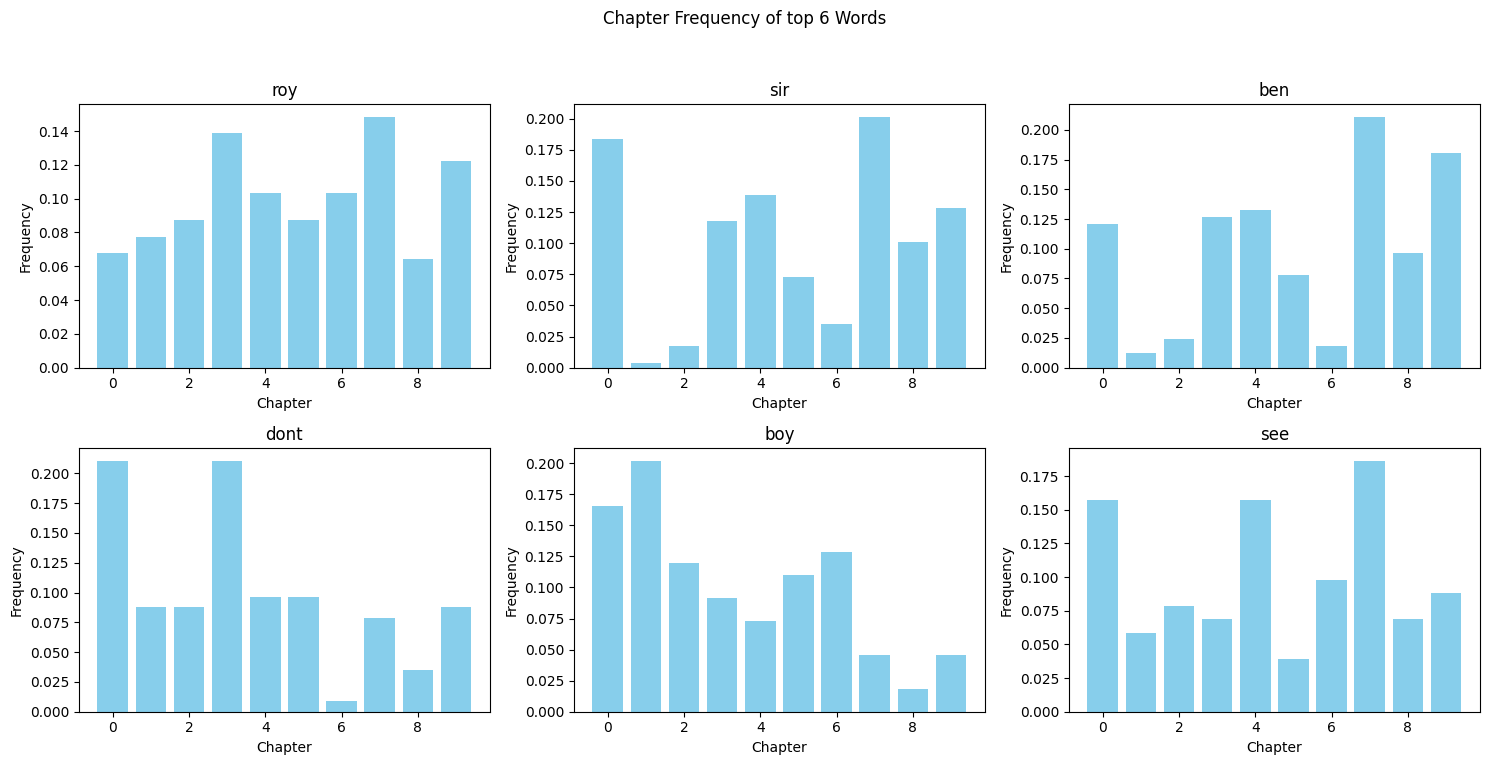

In [235]:
#Problem E continued
import matplotlib.pyplot as plt
import numpy as np

# Create bar charts
arrays = [roy, sir, ben, dont, boy, see]
arrayNames = ["roy", "sir", "ben", "dont", "boy", "see"]
array_sums = [roySum, sirSum, benSum, dontSum, boySum, seeSum]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Chapter Frequency of top 6 Words')

# Plot each array on a separate subplot
for i, ax in enumerate(axs.flatten()):
    ax.bar(range(len(arrays[i])), arrays[i], color='skyblue')
    ax.set_title(f'{arrayNames[i]}')
    ax.set_xlabel('Chapter')
    ax.set_ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()